### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
data.nunique()

,0
destination,3
passanger,4
weather,3
temperature,3
time,5
coupon,5
expiration,2
gender,2
age,8
maritalStatus,5


In [6]:
# Maximum null values in columns
data.isnull().sum().sort_values(ascending = False)


,0
car,12576
CoffeeHouse,217
Restaurant20To50,189
CarryAway,151
RestaurantLessThan20,130
Bar,107
weather,0
temperature,0
destination,0
passanger,0


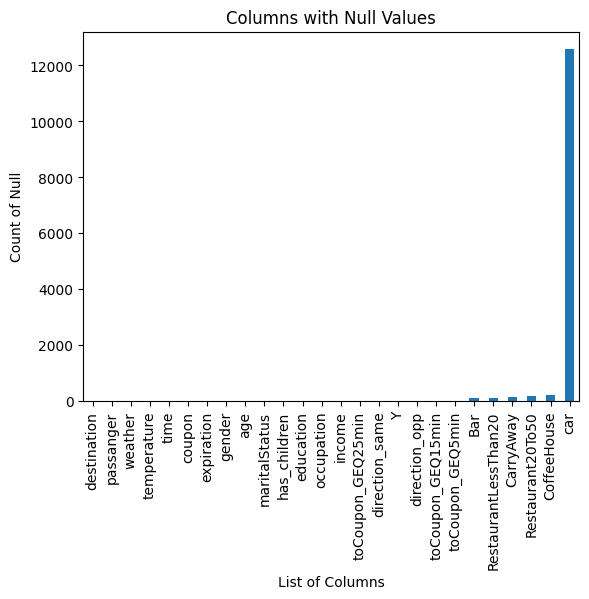

In [27]:
#Graphical representation of null values
data.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Columns with Null Values')
plt.xlabel('List of Columns')
plt.ylabel('Count of Null')
plt.savefig('graphs/null_col_count.png')

In [8]:
# Column Car is not used anywhere in the analysis so ignoring the null values in the colmun
# Other columns are essential as it determines

#data.groupby(data['CoffeeHouse'].isnull()).count()
#data.groupby(data['CoffeeHouse'])['Y'].count()


data_fill = data.copy()
data_fill['CoffeeHouse'] = data_fill['CoffeeHouse'].fillna('NoData')
data_fill['Restaurant20To50'] = data_fill['Restaurant20To50'].fillna('NoData')
data_fill['CarryAway'] = data_fill['CarryAway'].fillna('NoData')
data_fill['RestaurantLessThan20'] = data_fill['RestaurantLessThan20'].fillna('NoData')
data_fill['Bar'] = data_fill['Bar'].fillna('NoData')

In [9]:
#data.groupby(data['CoffeeHouse'])['Y'].count()
#data_fill.groupby(data_fill['CoffeeHouse'])['Y'].count()
#data.groupby(data['CoffeeHouse'].isnull()).count()
#data['CoffeeHouse'].unique()
#data_fill['CoffeeHouse'].unique()
#data_fill['Bar'].unique()


#nan_counts = data[['CoffeeHouse', 'Restaurant20To50', 'CarryAway','RestaurantLessThan20','Bar']].isna().sum()
#print(nan_counts)

#notnan_counts = data[['CoffeeHouse', 'Restaurant20To50', 'CarryAway','RestaurantLessThan20','Bar']].notna().sum()
#print(notnan_counts)

#rationan = nan_counts / notnan_counts
#print(rationan)


#find the ratio of how many values are blank will that impact the anaysis
data[['CoffeeHouse', 'Restaurant20To50', 'CarryAway','RestaurantLessThan20','Bar']].isna().mean()

# Almost all values are mssig the same % we are fine to ignore for now

,0
CoffeeHouse,0.017108
Restaurant20To50,0.014901
CarryAway,0.011905
RestaurantLessThan20,0.010249
Bar,0.008436


4. What proportion of the total observations chose to accept the coupon?



In [10]:
#data['coupon'].value_counts()
#data['coupon'].value_counts(normalize=True)


tot_c= data['coupon'].count()
print( tot_c)

df_group = data['coupon'].groupby(data['Y']).count()
df_group.head()

df = data['coupon'].groupby(data['Y']).count() / data['Y'].count()
df.head()
#print(tot_c)

# 57 % accepted and 43% rejected

12684


,coupon
Y,
0,0.431567
1,0.568433


In [28]:
# Total coupons accepted in each category
data.groupby('coupon')[['Y']].apply(lambda x: x.value_counts())


coupon                 Y
Bar                    0    1190
                       1     827
Carry out & Take away  1    1760
                       0     633
Coffee House           0    2001
                       1    1995
Restaurant(20-50)      0     834
                       1     658
Restaurant(<20)        1    1970
                       0     816
Name: count, dtype: int64

In [29]:
data.groupby('coupon')[['Y']].mean().round(2)

,Y
coupon,
Bar,0.41
Carry out & Take away,0.74
Coffee House,0.50
Restaurant(20-50),0.44
Restaurant(<20),0.71


5. Use a bar plot to visualize the `coupon` column.

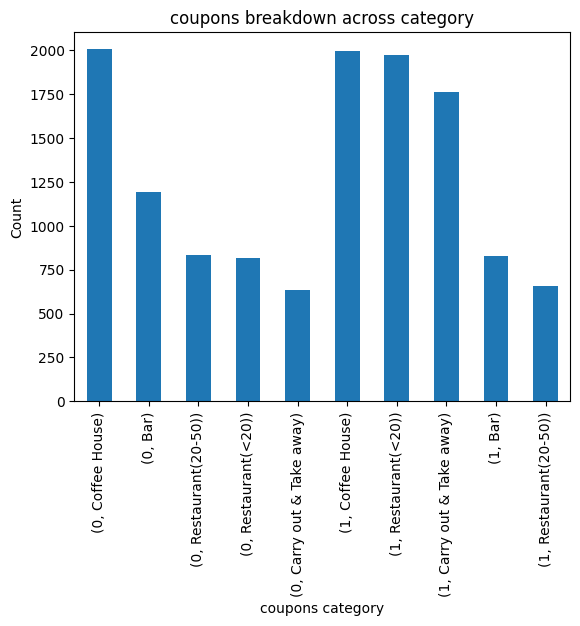

In [13]:
data['coupon'].groupby(data['Y']).value_counts().plot(kind = 'bar')
plt.title('coupons breakdown across category')
plt.xlabel('coupons category')
plt.ylabel('Count')
plt.savefig('graphs/coupons_acceptance_breakdown.png')

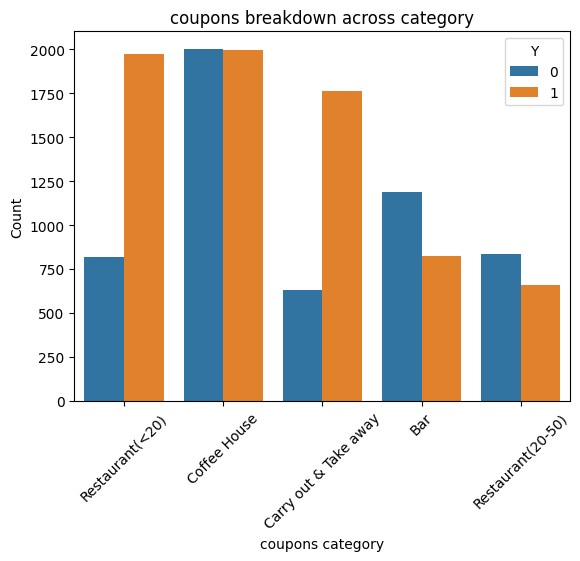

In [14]:
sns.countplot(x='coupon', data=data,   hue = 'Y' )
plt.xticks(rotation=45)
plt.title('coupons breakdown across category')
plt.xlabel('coupons category')
plt.ylabel('Count')
plt.savefig('graphs/sns_coupons_acceptance_breakdown.png')


6. Use a histogram to visualize the temperature column.

In [15]:
# of the overall fdata of 12k + we have data 6K + measure temp 70- 80, 50- 60 less than 4k

data.groupby(data['temperature'])
data['temperature'].unique()
#plt.hist(data['temperature'])

#data.hist(column='temperature', bins = 5)
#px.histogram(data, x="temperature")
#sns.displot(data=data, x="temperature", kde=True)
##sns.rugplot(data=data, x="temperature")
#sns.violinplot(data, x="temperature",y="coupon")

array([55, 80, 30])

In [16]:
data.groupby(data['temperature'])['Y'].mean()

,Y
temperature,
30,0.531088
55,0.536719
80,0.600337


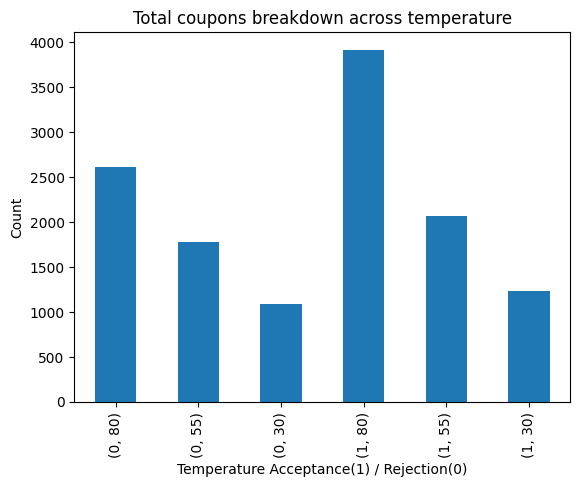

In [17]:

data['temperature'].groupby(data['Y']).value_counts().plot(kind = 'bar')
plt.title('Total coupons breakdown across temperature')
plt.xlabel('Temperature Acceptance(1) / Rejection(0)')
plt.ylabel('Count')
plt.savefig('graphs/coupons_temperature_breakdown.png')
#Max acceptenace of coupons when temp is 80
# when temp is 55 -- Coupons acceptance & Coupons rejected are failrly same
# when temp is 30 -- Coupons acceptance & Coupons rejected are failrly same

In [18]:
data['temperature'].groupby(data['Y']).value_counts()
#data['temperature'].value_counts()

Y  temperature
0  80             2609
   55             1779
   30             1086
1  80             3919
   55             2061
   30             1230
Name: count, dtype: int64

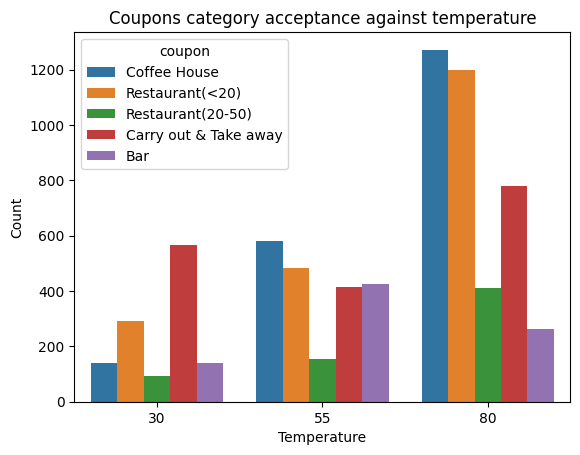

In [19]:
# For each category of coupons acceptance based on temperature
sns.countplot(x='temperature', data=data.query('Y == 1'),   hue = 'coupon' )
plt.title('Coupons category acceptance against temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.savefig('graphs/sns_coupons_acceptance_temperature_breakdown.png')

# top 3 acceptance of coupons cateogry ( All temp 80)
#1. Coffee house
#2. Restaurant(<20)
#3. Carry out & Take away

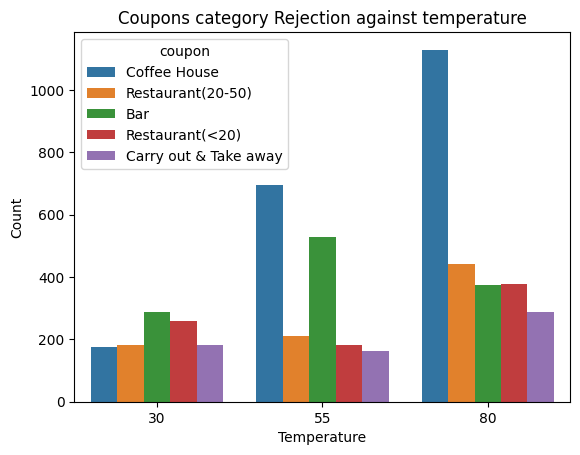

In [20]:
# For each category how many NOT accepted the coupon based on temperature
sns.countplot(x='temperature', data=data.query('Y == 0'),   hue = 'coupon' )
plt.title('Coupons category Rejection against temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.savefig('graphs/sns_coupons_rejection_temperature_breakdown.png')

# top 3 Rejection of coupons cateogry
#1. Coffee house - Also temp 80
#2. Restaurant(<20)  - Also temp 55
#3. Bar - Also temp 55

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
# For each category of coupons acceptance based on temperature
data_onlybar = data.query('coupon == "Bar"')
data_onlybar.head()

#

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [22]:
#passanger

data['coupon'].groupby(data['Y']).value_counts()
#data.groupby('coupon').value_counts('Y')
#data_onlybar.groupby('Bar').sum()[['Y']]

Y  coupon               
0  Coffee House             2001
   Bar                      1190
   Restaurant(20-50)         834
   Restaurant(<20)           816
   Carry out & Take away     633
1  Coffee House             1995
   Restaurant(<20)          1970
   Carry out & Take away    1760
   Bar                       827
   Restaurant(20-50)         658
Name: count, dtype: int64

In [20]:
Total_rows = data.shape[0]
print(Total_rows)
(data['coupon'].groupby(data['Y']).value_counts() / Total_rows * 100).round(2)

# so overall 6 % accepted the Bar coupons & 9% rejected Bar coupons

12684


Y  coupon               
0  Coffee House             15.78
   Bar                       9.38
   Restaurant(20-50)         6.58
   Restaurant(<20)           6.43
   Carry out & Take away     4.99
1  Coffee House             15.73
   Restaurant(<20)          15.53
   Carry out & Take away    13.88
   Bar                       6.52
   Restaurant(20-50)         5.19
Name: count, dtype: float64

In [ ]:
#sns.countplot(x='passanger', data=data_onlybar,   hue = 'Y' )

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


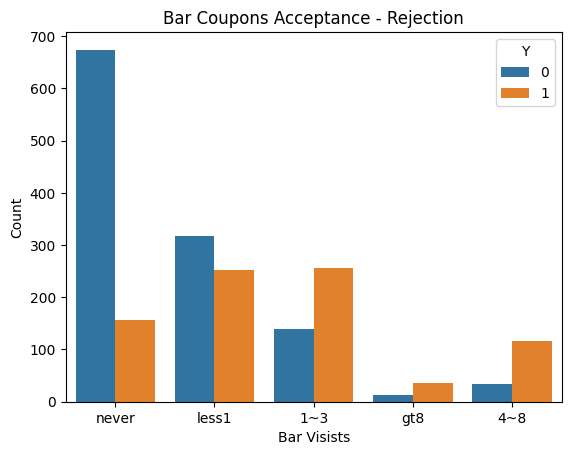

In [21]:
#
#sns.countplot(x='Bar', data=data,   hue = 'Y' )
data.groupby(data['coupon'])['Bar'].count()
#sns.countplot(x='Bar', data=data,   hue = 'Y' )
sns.countplot(x='Bar', data=data_onlybar,   hue = 'Y' )
#data_onlybar.groupby('Bar')[['Y']].value_counts()
plt.title('Bar Coupons Acceptance - Rejection')
plt.xlabel('Bar Visists')
plt.ylabel('Count')
plt.savefig('graphs/sns_Barcoupons_accept-reject.png')

# The acceptance rate is more who went less than 3 times or lesser compared to who went more than 3 times

In [ ]:
data_onlybar.groupby(['coupon','Bar'])['Y'].agg(['count','mean'])

count      mean
coupon Bar                   
Bar    1~3      397  0.647355
       4~8      150  0.780000
       gt8       49  0.734694
       less1    570  0.443860
       never    830  0.187952

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


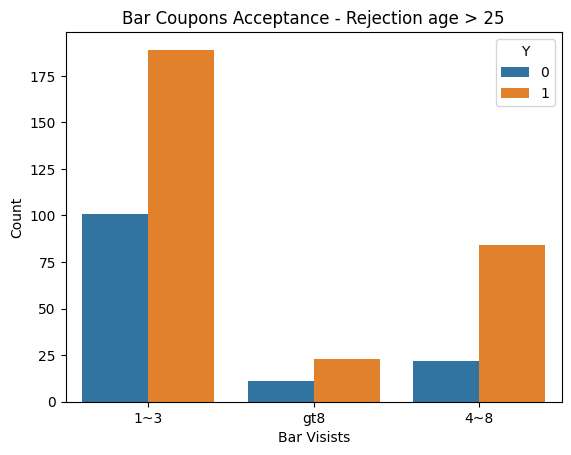

In [23]:
list_of_Bar = ['1~3', 'gt8', '4~8']
filtered_data_g25 = data_onlybar.query("Bar in @list_of_Bar and age > '25'")
filtered_data_g25.head()

filtered_data_g25.groupby('Bar')[['Y']].value_counts()
sns.countplot(x='Bar', data=filtered_data_g25,   hue = 'Y' )
plt.title('Bar Coupons Acceptance - Rejection age > 25')
plt.xlabel('Bar Visists')
plt.ylabel('Count')
plt.savefig('graphs/sns_Barcoupons_accept-reject_g25.png')


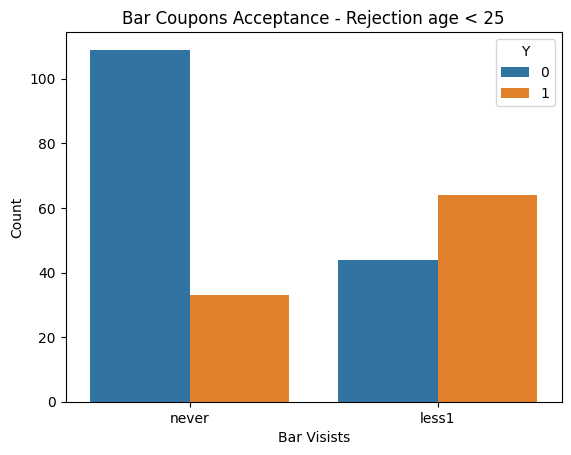

In [24]:
list_of_Bar_others = ['less1', 'never']
filtered_data_less25 = data_onlybar.query("Bar in @list_of_Bar_others and age < '25'")
filtered_data_less25.head()

sns.countplot(x='Bar', data=filtered_data_less25,   hue = 'Y' )
plt.title('Bar Coupons Acceptance - Rejection age < 25')
plt.xlabel('Bar Visists')
plt.ylabel('Count')
plt.savefig('graphs/sns_Barcoupons_accept-reject_l25.png')

In [27]:
data.groupby(['Bar','age'], as_index= False)['Y'].agg(['count','mean']).sort_values(by = 'age')
# Age 50 PLus has maximum count of 1050 and 45% acceptance when compared to 21 years age group of count 849 and 55%
# People of the Age of 21 went to Bar 1`3 more times when compared to any other age category
# Age of 21 people went to BAR "less 1 " compared to any other group


,Bar,age,count,mean
0,1~3,21,660,0.618182
28,never,21,849,0.559482
20,less1,21,742,0.605121
8,4~8,21,286,0.636364
15,gt8,21,110,0.627273
1,1~3,26,605,0.609917
29,never,26,874,0.562929
21,less1,26,522,0.568966
9,4~8,26,416,0.697115
16,gt8,26,130,0.530769


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
#df_data = data.groupby(['passanger','Bar','occupation'], as_index= False)['Y'].agg(['count','sum','mean'])
df_data = data.query('passanger != "Kid(s)"').query('occupation != "Farming Fishing And Forestry"').query("Bar != 'less1' and Bar != 'never'" )
df_filter = df_data.groupby(['passanger','Bar','occupation'], as_index= False)['Y'].agg(['count','sum','mean']).round(2).sort_values(by = 'count', ascending=False)
#df_filter = df_filter.query("count > 20").sort_values(by = 'mean', ascending=False)
#df_filter = df_filter.query("count > 20").sort_values(by = 'count', ascending=False)
df_filter.head(40)

#df_filter['short_occupation'] = df_filter['occupation']
#df_filter_g50 = df_filter.query("count > 50")
#df_filter_g50.sort_values(by = 'mean', ascending=False)
#df_filter_g50.query("passanger == 'Alone'").sort_values(by = 'count', ascending=False)
#df_filter.describe()

# based on the data we can see the people who are unemplyeed and who are alone goes to a Bar 1-3 times with a acceptance rate of 62%
# based on the data we can see the people who are unemplyeed and who are with frimnds goes to a Bar 4-8 times with a acceptance rate of 61%
# based on the data we can see the people who are unemplyeed and who are with frimnds goes to a Bar 1-3 times with a acceptance rate of 85%
# People who are working in amanagemnet also has acceptnace rate of 56% & 62% even if they are alone or with frinnds . they go 1-3 & 4-8

#Jobs that go bar more often Unemployed , Student, Computer & Mathematical, Management, Sales & Related, Office & Administrative Support	, Business & Financial	, Education&Training&Library

,passanger,Bar,occupation,count,sum,mean
22,Alone,1~3,Unemployed,190,119,0.63
20,Alone,1~3,Student,184,98,0.53
4,Alone,1~3,Computer & Mathematical,165,85,0.52
19,Alone,1~3,Sales & Related,148,96,0.65
13,Alone,1~3,Management,124,70,0.56
31,Alone,4~8,Management,92,57,0.62
38,Alone,4~8,Unemployed,90,55,0.61
71,Friend(s),1~3,Unemployed,88,75,0.85
14,Alone,1~3,Office & Administrative Support,88,46,0.52
69,Friend(s),1~3,Student,78,49,0.63


In [29]:
df_filter_less50 = df_filter.query("count < 50")
df_filter_less50.head()
df_filter_less50.sort_values(by = 'mean', ascending=False)
#sns.barplot(df_filter_less50, x='passanger', y='count', hue='occupation')

,passanger,Bar,occupation,count,sum,mean
95,Friend(s),gt8,Sales & Related,6,6,1.0
106,Partner,1~3,Healthcare Practitioners & Technical,2,2,1.0
113,Partner,1~3,Protective Service,1,1,1.0
100,Partner,1~3,Building & Grounds Cleaning & Maintenance,1,1,1.0
70,Friend(s),1~3,Transportation & Material Moving,7,7,1.0
...,...,...,...,...,...,...
41,Alone,gt8,Legal,17,0,0.0
90,Friend(s),gt8,Legal,5,0,0.0
112,Partner,1~3,Personal Care & Service,1,0,0.0
108,Partner,1~3,Installation Maintenance & Repair,1,0,0.0


In [31]:
#df_filter['short_occupation'].unique()
#data['passanger'].unique()

#df_filter['short_occupation'] = df_filter['short_occupation'].replace(['Architecture & Engineering', 'Business & Financial',
#       'Computer & Mathematical', 'Education&Training&Library',
#       'Food Preparation & Serving Related', 'Legal', 'Management',
#       'Office & Administrative Support', 'Personal Care & Service',
#       'Sales & Related', 'Student', 'Unemployed',
#       'Healthcare Practitioners & Technical',
#       'Transportation & Material Moving', 'Construction & Extraction',
#       'Installation Maintenance & Repair',
#       'Life Physical Social Science', 'Production Occupations',
#       'Protective Service', 'Building & Grounds Cleaning & Maintenance',
#       'Retired', 'Arts Design Entertainment Sports & Media',
#       'Healthcare Support'],['Arch & Eng', 'Busi & Fin',
#       'Comp & Math', 'Edu','Food', 'Legal', 'Management',
#       'OfficAdmin', 'Personal Care','Sales', 'Student', 'Unemployed',
#       'Healthcare P','Transport', 'Construction',
#       'Installation','LifePhysical', 'Production','Protective Ser', 'Building Maint',
#       'Retired', 'Arts', 'Healthcare S'])

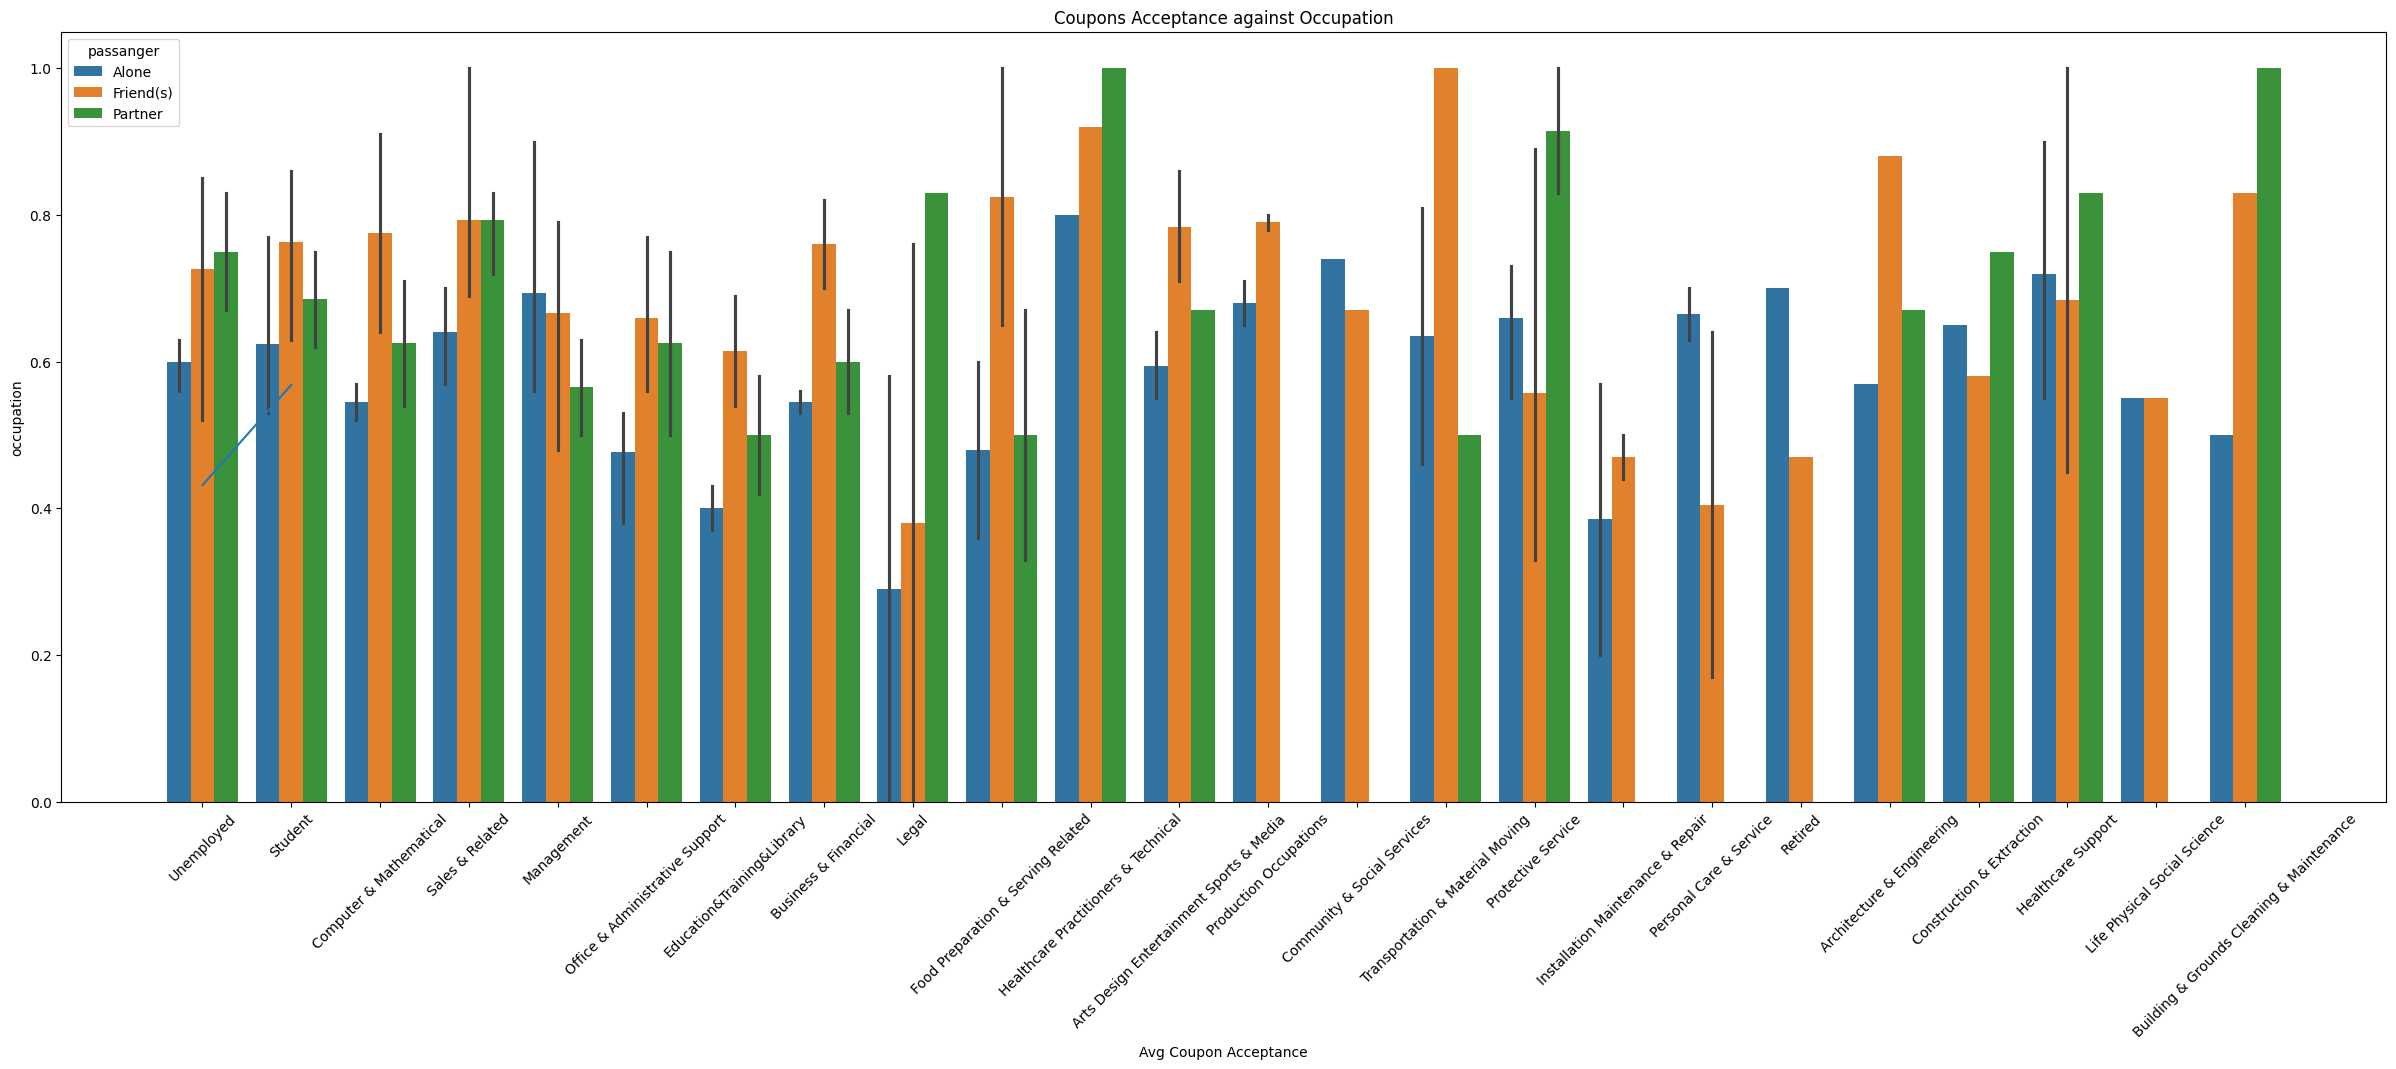

In [47]:
sns.barplot(df_filter, x='occupation', y='mean',hue = 'passanger')
df.plot(figsize=(30, 10))
plt.xticks(rotation=45)
plt.title('Coupons Acceptance against Occupation')
plt.xlabel('Avg Coupon Acceptance')
plt.ylabel('occupation')
plt.savefig('graphs/sns_coupons_accept-reject_Occupation.png')

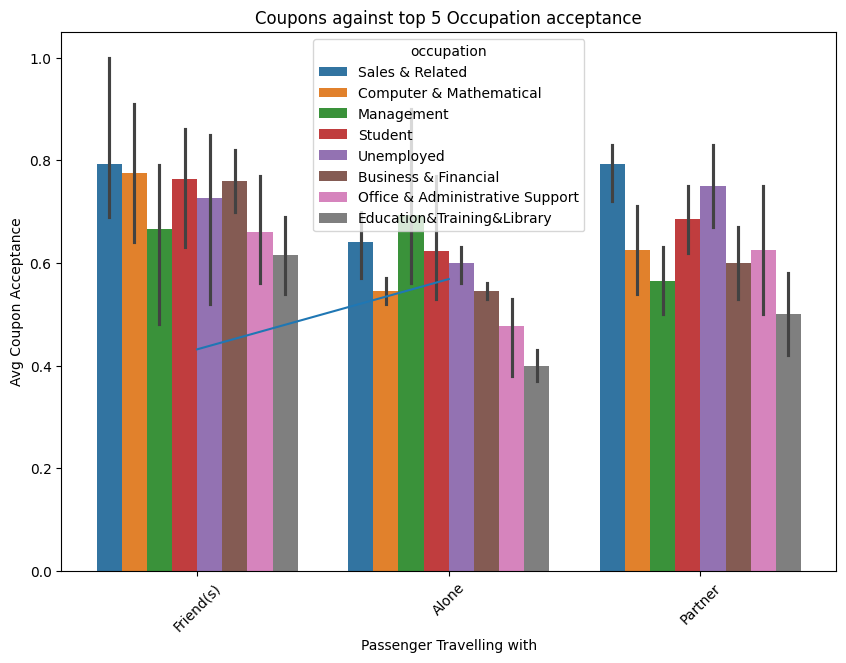

In [49]:
#Unemployed , Student, Computer & Mathematical, Management, Sales & Related, Office & Administrative Support	, Business & Financial	, Education&Training&Library
list_of_top_occup_count = ['Unemployed', 'Student', 'Computer & Mathematical', 'Sales & Related', 'Management', 'Office & Administrative Support','Business & Financial','Education&Training&Library']
df_top_occup_count = df_filter.query('passanger != "Kid(s)"').query('occupation in @list_of_top_occup_count').query("Bar != 'less1' and Bar != 'never'" ).sort_values(by = 'mean', ascending=False)
sns.barplot(df_top_occup_count, x='passanger', y='mean', hue='occupation')
df.plot(figsize=(10, 7))
plt.xticks(rotation=45)
plt.title('Coupons against top 5 Occupation acceptance')
plt.xlabel('Passenger Travelling with')
plt.ylabel('Avg Coupon Acceptance')
plt.savefig('graphs/sns_coupons_accept-reject_top5_Occupation.png')
# passengers traveling alone goes to the bar more often
# what we find is passenger who are Alone and with occupation "unemployed" goes to the bar (190)
# what we find is passenger who are Alone and with occupation "" goes to the bar (190)


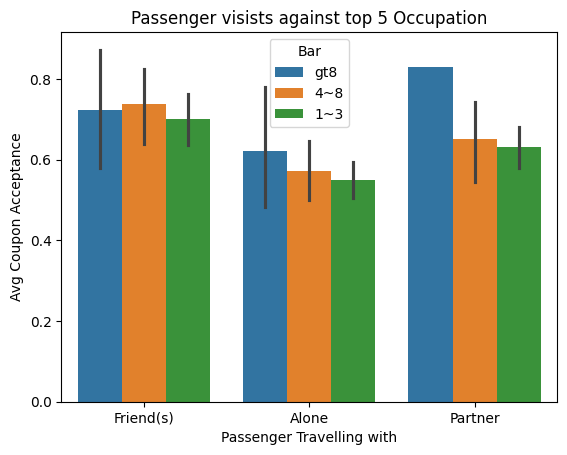

In [50]:
sns.barplot(df_top_occup_count, x='passanger', y='mean', hue='Bar')
plt.title('Passenger visists against top 5 Occupation')
plt.xlabel('Passenger Travelling with')
plt.ylabel('Avg Coupon Acceptance')
plt.savefig('graphs/sns_Barcoupons_accept-reject_Occupation.png')
# They are gfoing 1-3 times in a month
# 4-8 is the second
# greater than 8

In [51]:
data['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [52]:


df_data = data.groupby(['passanger','Bar','age'], as_index= False)['Y'].agg(['count','sum','mean'])
df_filter_1 = df_data.query('passanger != "Kid(s)"').query("Bar != 'less1' and Bar != 'never'" ).sort_values(by = 'mean', ascending=False)
df_filter_1.head().sort_values(by = 'count', ascending=False)
#df_filter_1.shape

#sns.barplot(df_filter_1, x='passanger', y='mean', hue='Bar')

,passanger,Bar,age,count,sum,mean
39,Friend(s),1~3,36,44,39,0.886364
101,Partner,1~3,41,20,17,0.850000
48,Friend(s),4~8,41,8,7,0.875000
102,Partner,1~3,46,6,5,0.833333
111,Partner,gt8,31,6,5,0.833333


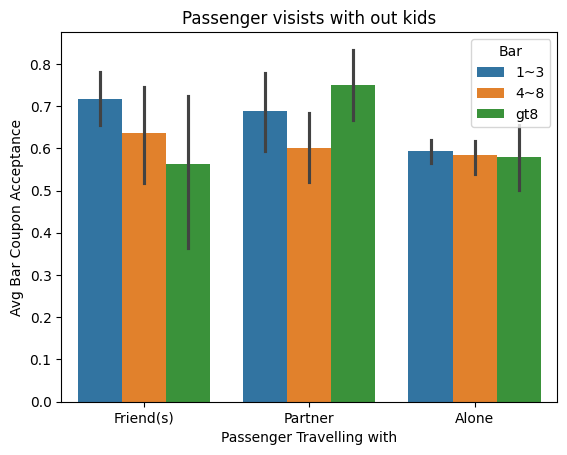

In [53]:
sns.barplot(df_filter_1, x='passanger', y='mean', hue='Bar')
plt.title('Passenger visists with out kids')
plt.xlabel('Passenger Travelling with')
plt.ylabel('Avg Bar Coupon Acceptance')
plt.savefig('graphs/sns_Barcoupons_accept-reject_withoutkids.png')

In [54]:
# go to bars more than once a month and are under the age of 30
data['age'].unique()
list_age = ['21', '26', 'below21']
df_filter_2 = df_data.query('passanger != "Kid(s)"').query("Bar != 'less1' and Bar != 'never'" ).query( "age in @list_age" ).sort_values(by = 'mean', ascending=False)
df_filter_2.head(20).sort_values(by = 'age', ascending=False)
#df_filter_2.shape


,passanger,Bar,age,count,sum,mean
19,Alone,gt8,below21,17,11,0.647059
43,Friend(s),1~3,below21,9,5,0.555556
7,Alone,1~3,below21,34,20,0.588235
55,Friend(s),gt8,below21,5,4,0.800000
45,Friend(s),4~8,26,126,104,0.825397
1,Alone,1~3,26,362,204,0.563536
98,Partner,1~3,26,55,32,0.581818
9,Alone,4~8,26,266,169,0.635338
16,Alone,gt8,26,74,39,0.527027
110,Partner,gt8,26,6,4,0.666667


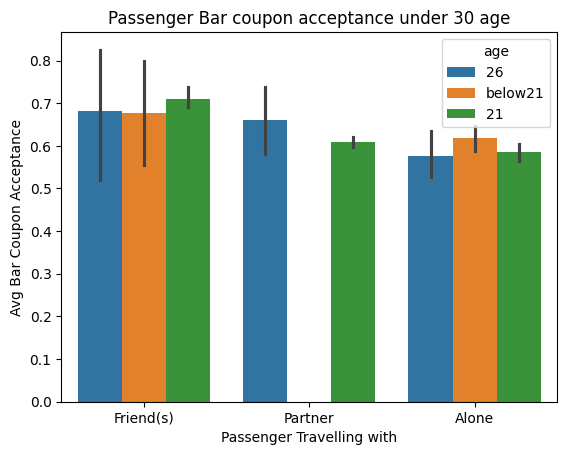

In [55]:
sns.barplot(df_filter_2, x='passanger', y='mean', hue='age')
plt.title('Passenger Bar coupon acceptance under 30 age')
plt.xlabel('Passenger Travelling with')
plt.ylabel('Avg Bar Coupon Acceptance')
plt.savefig('graphs/sns_Barcoupons_accept-reject_ageunder30.png')

# passenger with frinds who are aged 21 has acceptance rate of 80% but the count is vey less so it has to be ignoired
 #passenger with the age below 21 does not go to the bar that often
 #passenger with age og 26 has good acceptance rate with all 3 (travelling with frinds , partner or alsone)


In [56]:
#data['income'].unique()
df_data = data.groupby(['passanger','RestaurantLessThan20','age','income'], as_index= False)['Y'].agg(['count','mean'])
#df_filter_3 = df_data.query("RestaurantLessThan20 == '4~8' and RestaurantLessThan20 == 'gt8'" ).query( "income == 'Less than $12500'" ).sort_values(by = 'count', ascending=False)
df_filter_3 = df_data.query("RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8'" ).query( "income == 'Less than $12500'" ).sort_values(by = 'mean', ascending=False)
df_filter_3.head(20).sort_values(by = 'count', ascending=False)
#df_filter_3.shape
#sns.barplot(df_filter_3, x='passanger', y='mean', hue='RestaurantLessThan20')

,passanger,RestaurantLessThan20,age,income,count,mean
69,Alone,4~8,21,Less than $12500,67,0.567164
77,Alone,4~8,26,Less than $12500,46,0.630435
155,Alone,gt8,below21,Less than $12500,34,0.735294
124,Alone,gt8,21,Less than $12500,28,0.785714
277,Friend(s),4~8,21,Less than $12500,26,0.807692
603,Partner,4~8,below21,Less than $12500,23,0.521739
285,Friend(s),4~8,26,Less than $12500,20,0.900000
92,Alone,4~8,36,Less than $12500,17,0.411765
113,Alone,4~8,50plus,Less than $12500,17,0.588235
104,Alone,4~8,46,Less than $12500,17,0.764706


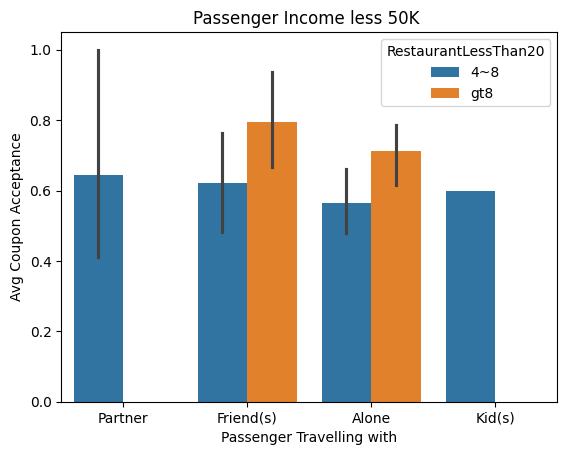

In [57]:
sns.barplot(df_filter_3, x='passanger', y='mean', hue='RestaurantLessThan20')
plt.title('Passenger Income less 50K ')
plt.xlabel('Passenger Travelling with')
plt.ylabel('Avg Coupon Acceptance')
plt.savefig('graphs/sns_coupons_incomel50_morethan3.png')
#passenger who are travelling alone go to the chper resyurant more often and the acceptance ratio is 78% for the age of 21 and they have gone to restutnat mnay times

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
   #1. Passenger with age of 26 has good acceptance rate with all 3 (travelling with friends , partner or alone)
   #2. passenger who are travelling alone go to the cheaper resturant for the age of 21.
   #3. Passengers with the age group of 50 pLus has a 45% acceptance

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [23]:
data['coupon'].groupby(data['Y']).value_counts()
#based on the data we investigated Bar --
# I see a good acceptance on Restutant <20 and Carry out & take away and Resturant < 20 we had done analysis
# i will perform some analysis on "Carry out & Take away"

Y  coupon               
0  Coffee House             2001
   Bar                      1190
   Restaurant(20-50)         834
   Restaurant(<20)           816
   Carry out & Take away     633
1  Coffee House             1995
   Restaurant(<20)          1970
   Carry out & Take away    1760
   Bar                       827
   Restaurant(20-50)         658
Name: count, dtype: int64

In [101]:
data['CarryAway'].unique()
df_data_carryout = data.groupby(['passanger',"coupon",'age','CarryAway'], as_index= False)['Y'].agg(['count','mean','sum'])
#df_data_carryout.shape
df_filter_carryout = df_data_carryout.query("coupon == 'Carry out & Take away'")
df_filter_carryout.head(25).sort_values(by = 'count', ascending=False).round(2)
#df_filter_carryout.shape


,passanger,coupon,age,CarryAway,count,mean,sum
43,Alone,Carry out & Take away,26,1~3,140,0.71,99
39,Alone,Carry out & Take away,21,4~8,110,0.75,83
38,Alone,Carry out & Take away,21,1~3,107,0.64,69
49,Alone,Carry out & Take away,31,4~8,95,0.69,66
44,Alone,Carry out & Take away,26,4~8,83,0.75,62
54,Alone,Carry out & Take away,36,4~8,58,0.76,44
48,Alone,Carry out & Take away,31,1~3,57,0.82,47
41,Alone,Carry out & Take away,21,less1,50,0.72,36
50,Alone,Carry out & Take away,31,gt8,43,0.60,26
53,Alone,Carry out & Take away,36,1~3,42,0.71,30


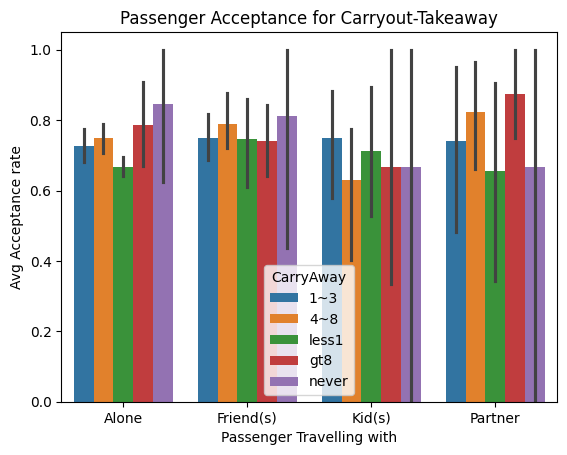

In [90]:
sns.barplot(df_filter_carryout, x='passanger', y='mean', hue='CarryAway')
plt.title('Passenger Acceptance for Carryout-Takeaway')
plt.xlabel('Passenger Travelling with')
plt.ylabel('Avg Acceptance rate')
plt.savefig('graphs/sns_carryout_acceptance.png')

In [110]:
px.box(df_filter_carryout, x = 'passanger', y = 'count',color= "CarryAway" )


In [ ]:
#Based on the data you see the acceptance rate for carryout with pasengers travelling alone, or frineds , partner , kids are fairly same
#But the count when passengers travelling with partner & kids are less than 20 when compared to passengers travelling alone , with friends
#hence partner & kids can be ignored


In [100]:
df_filter_carryout_fr_alone = df_data_carryout.query("coupon == 'Carry out & Take away'").query("passanger == 'Friend(s)' or passanger == 'Alone'" ).sort_values(by = 'count', ascending=False)
df_filter_carryout.head(25).sort_values(by = 'mean', ascending=False).round(2)
#df_filter_carryout.head(25).sort_values(by = 'count', ascending=False).round(2)

,passanger,coupon,age,CarryAway,count,mean,sum
251,Friend(s),Carry out & Take away,50plus,4~8,41,0.90,37
40,Alone,Carry out & Take away,21,gt8,41,0.85,35
67,Alone,Carry out & Take away,50plus,4~8,88,0.83,73
228,Friend(s),Carry out & Take away,26,1~3,70,0.83,58
57,Alone,Carry out & Take away,41,1~3,35,0.83,29
48,Alone,Carry out & Take away,31,1~3,57,0.82,47
225,Friend(s),Carry out & Take away,21,4~8,48,0.79,38
224,Friend(s),Carry out & Take away,21,1~3,64,0.78,50
66,Alone,Carry out & Take away,50plus,1~3,47,0.77,36
54,Alone,Carry out & Take away,36,4~8,58,0.76,44


In [ ]:
# Acceptance rate for Passengers who are 50 plus of age and travelling with friends take carry out (4~8) times with an success rate of 90%
# Acceptance rate for Passengers who are 21 of age and travelling alone take carry out (greater than 8) times with an success rate of 85%
# Acceptance rate for Passengers who are 50 plus of age and travelling with friends take carry out (4~8) times with an success rate of 83%
# Age 21 & 51 plus travelling alone or with friends have good success rate.